Hunter Bennett | Glass Lab | Kupffer Strains Project | 11 April 2023

Notebook for analysis of cumulative distribution of effect size (log2fold change of transcription) of *cis* and *trans* genes in the parental strains.

### Import packages, set plotting parameters

In [1]:
### header ###
__author__ = "Hunter Bennett"
__license__ = "BSD"
__email__ = "hunter.r.bennett@gmail.com"
%load_ext autoreload
%autoreload 2
%matplotlib inline
### imports ###
import os
import re
import glob
import pandas as pd
import numpy as np
from scipy.stats import mannwhitneyu
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

Set working directory

In [2]:
workingDirectory = '/home/h1bennet/strains_github/results/Figure4/'
if not os.path.isdir(workingDirectory):
    os.mkdir(workingDirectory)
os.chdir(workingDirectory)

In [3]:
#### PLOTTING PARAMETERS FOR MANUSCRIPT ####
# # get matplotlib to save readable fonts
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.size'] = 8
matplotlib.rcParams['savefig.dpi'] = 500


# line widths
matplotlib.rcParams['axes.linewidth'] = 1
matplotlib.rcParams['xtick.major.width'] = 1
matplotlib.rcParams['ytick.major.width'] = 1

# adjust defualt color for plots to black
# normal default is a dark gray
COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR
matplotlib.rcParams['axes.edgecolor'] = COLOR

#### PLOT PARAMETERS FOR THIS PLOT ####

Import *cis* and *trans* gene lists

In [4]:
f1_dict = {}
for genelist in glob.glob('./gene_lists/*filt_pval.txt'):
    with open(genelist, 'r') as f:
        listid = genelist.split('/')[-1].replace('.txt','')
        f1_dict[listid] = [i.strip() for i in f.readlines()[1:]]

In [5]:
all_trans = set(f1_dict['cb6f1_kupffer_trans_c57_filt_pval']).union(f1_dict['cb6f1_kupffer_trans_balb_filt_pval'])
all_cis = set(f1_dict['cb6f1_kupffer_cis_c57_filt_pval']).union(f1_dict['cb6f1_kupffer_cis_balb_filt_pval'])

Import DESeq2 output with log2 fold change values for each gene

In [6]:
df_control = pd.read_csv('./balbcj_control.vs.c57bl6j_control.deseq.txt',
                         sep='\t', index_col=0)

### Look at magnitude of fold change in F0 for cis and trans genes

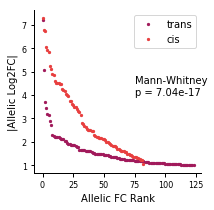

In [7]:
fig, ax = plt.subplots(figsize=(3,3))

cmap = matplotlib.cm.get_cmap('rocket')

ax.scatter(np.arange(len(all_trans)),
           np.sort(np.abs(df_control.loc[all_trans, 'log2FoldChange']))[::-1],
           c=cmap(.4),
           label='trans',
           s=5)

ax.scatter(np.arange(len(all_cis)),
           np.sort(np.abs(df_control.loc[all_cis, 'log2FoldChange']))[::-1],
           c=cmap(.6),
           label='cis',
           s=5)

# Set axis labels
ax.set_xlabel('Allelic FC Rank', fontsize=10)
ax.set_ylabel('|Allelic Log2FC|', fontsize=10)

# fix spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# calculate mann whitney
stat, p = mannwhitneyu(np.sort(np.abs(df_control.loc[all_trans, 'log2FoldChange'])),
             np.sort(np.abs(df_control.loc[all_cis, 'log2FoldChange'])))

# anotate p value
ax.text(75, 4,
        'Mann-Whitney\np = %.2e' % p,
        fontsize=10)
# annotate legend
ax.legend(fontsize=10)